 IMPORT NECESSARY LIBRARIES

In [0]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


IMPORT DATA

In [0]:
iris = datasets.load_iris()
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels


TRAIN AND TEST SPLIT 

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)


TRAIN A RANDOM FOREST CLASSIFIER

In [4]:
RFClf=RandomForestClassifier(n_estimators=100) #creating a gaussian classifier
RFClf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

RESULTS

In [5]:
y_pred=RFClf.predict(X_test) #prediction on test set
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.9777777777777777
[[12  0  0]
 [ 0 19  0]
 [ 0  1 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.95      1.00      0.97        19
           2       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



PREDICT ON A DATAPOINT



In [6]:
RFClf.predict([[3, 5, 4, 2]])

array([2])

In [0]:
from sklearn import tree
TreeClf = tree.DecisionTreeClassifier()
TreeClf = TreeClf.fit(X_train, y_train)


In [8]:
y_pred=TreeClf.predict(X_test) #prediction on test set
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.9777777777777777
[[12  0  0]
 [ 0 19  0]
 [ 0  1 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.95      1.00      0.97        19
           2       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [9]:
TreeClf.predict([[3, 5, 4, 2]])

array([1])

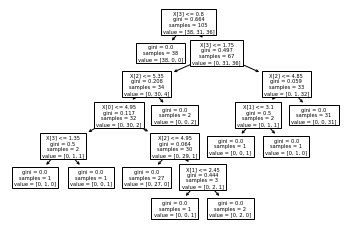

In [10]:
tree.plot_tree(TreeClf);


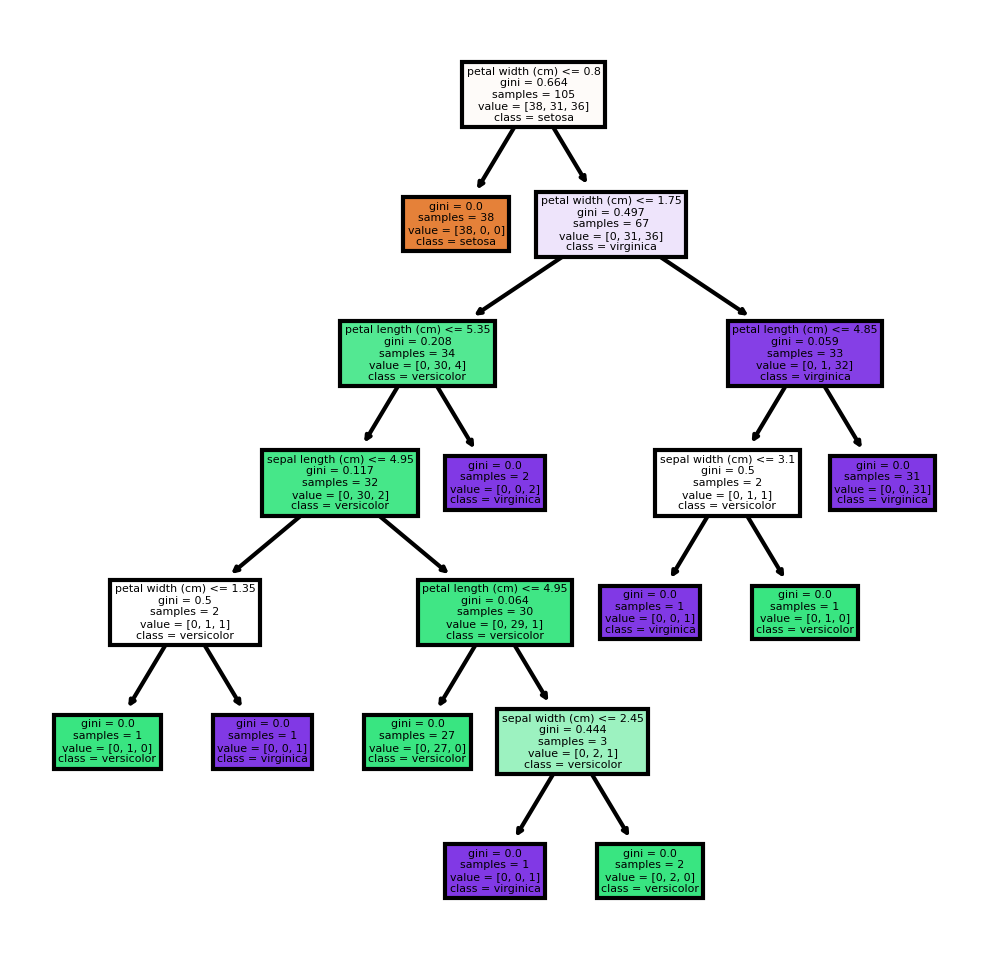

In [12]:
import matplotlib.pyplot as plt

fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(TreeClf,
               feature_names = fn, 
               class_names=cn,
               filled = True);